In [1]:
import pandas as pd
import numpy as np
import tensorflow 
import pandas_datareader as web
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




ModuleNotFoundError: No module named 'tensorflow'

In [101]:
df=web.DataReader('AAPL', data_source='yahoo',start='2012-01-03',end='2019-12-17')


In [102]:
data=df['Open']
cdf=data.values
eig=math.ceil(len(cdf)*0.8)
cdf=cdf.reshape(-1,1)


In [103]:
scaler=MinMaxScaler(feature_range=(0,1))
cdf=scaler.fit_transform(cdf)
train_data=cdf[0:eig,:]

In [104]:
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
x_train, y_train=np.array(x_train), np.array(y_train)    

In [105]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [106]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))


In [107]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [108]:
model.fit(x_train,y_train , batch_size=1, epochs=1)

1543/1543 [==============================] - 81s 47ms/step - loss: 7.5123e-04


In [109]:
test_data=cdf[eig-60:,:]
x_test=[]
y_test=cdf[eig:,:]
for i in range (60 ,len(test_data)):
    x_test.append(test_data[i-60:i,0])


In [110]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
y_test=np.array(y_test)

In [111]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
y_test=scaler.inverse_transform(y_test)

13/13 [==============================] - 3s 24ms/step


In [112]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.40513425827026367

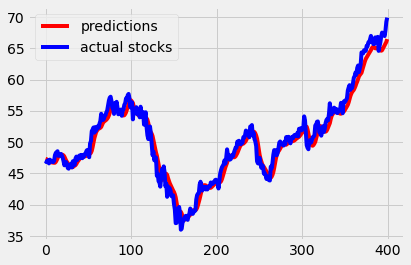

In [113]:
plt.plot(predictions,color='red',label='predictions')
plt.plot(y_test,color='blue',label='actual stocks')
plt.legend()